# Inaugural Project: Exchange Economy

First we start by importing the relevant stuff

In [26]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import matplotlib.pyplot as plt
import Functions as fn
model = fn.ExchangeEconomyClass()
from scipy.optimize import minimize
import scipy.optimize as optimize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table of Contents
[Question 1](#Question.1) : Edgeworth box

[Question 2](#Question.2) : Market clearing conditions

[Question 3](#Question.3) : Market clearing price

[Question 4](#Question.4) : 4.a: allocation for specefic p1's & 4.b allocation if any price can be chosen

[Question 5](#Question.5) : 5.a: Allocation for resticted choice 5.b: allocation without restrictions 

[Question 6](#Question.6) : 6.a: Consumption choices by utilitarian social planner

[Question 7&8](#Question.7&8): Random endownment and market equilibrium allocation plottet in Edgeworth box


# Question.1

To illustrate the Edgeworth box, we start by setting up the model and the parameters in Functions.py. The Edgeworth box shows combinations of the two goods that are pareto optimal. 

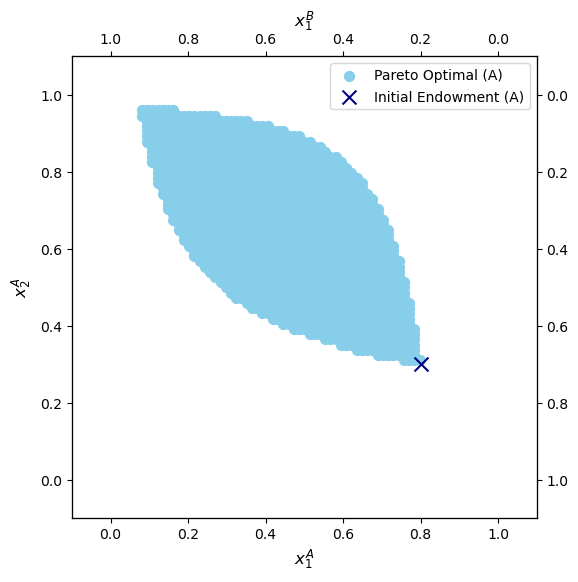

In [27]:

par = model.par
pareto_improvements = model.pareto()
model.edgeworth_box_1()

# Question.2

Now we calculate the error in the market clearing conditions. That is we examine how far the market is from equilibrium for each price p_1 within P1


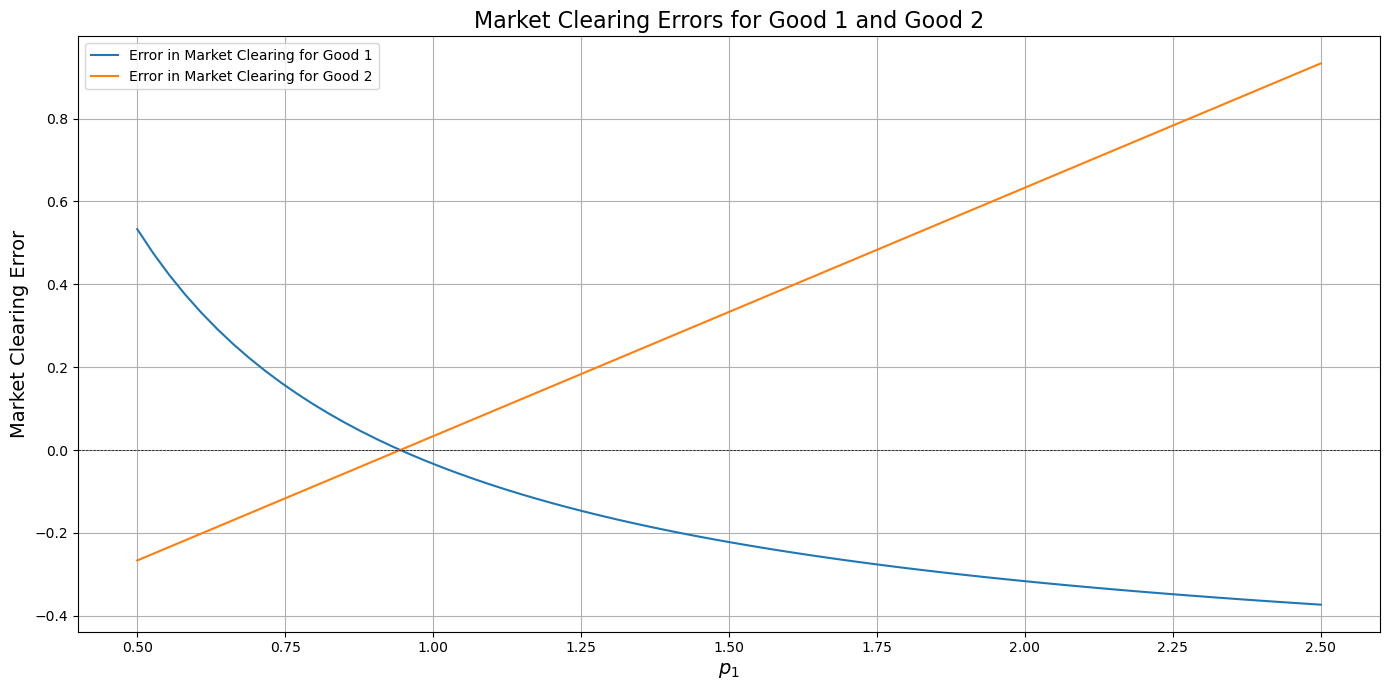

In [28]:

model.market_clearing_conditions_2()

# Question.3

Now we find the market clearing price for p1

In [29]:
p1__ = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)
print(f'The equilibrium price of good 1 found analytically is : {p1__:.3f}')

#Optimize the price by minimizing the errors of market clearing conditions. 
print(f'The optimal price of good 1 found by minimizing the errors of market clearing conditions is: {model.optimize_price_3()} ')


The equilibrium price of good 1 found analytically is : 0.944
The optimal price of good 1 found by minimizing the errors of market clearing conditions is: 0.9444428544211817 


# Question.4

Now we assume that A chooses the price to maximize her own utility. 
We find the allocation, first in the scenario where only prices in P1 can be chosen. Secondly the allocation if any positive price can be chosen. 
We assume that A chooses B's consumption, but that B cannot be worse of than in the initial endowment. Thus A is market maker


In [30]:
price_1, utility_1, x1A_allocation, x2A_allocation = model.maximize_utility_A_via_grid_search_4A()

print(f'Consumer A will choose p1 = {price_1:.2f} to maximize her own utility, which is {utility_1:.2f}')
print(f'The allocation is given as: x1A = {x1A_allocation:.2f} and x2A = {x2A_allocation:.2f}')

Consumer A will choose p1 = 1.91 to maximize her own utility, which is 0.63
The allocation is given as: x1A = 0.62 and x2A = 0.64


In [53]:

# Calculate the allocation that maximizes utility for consumer A
price_1, utility_1, x1A_allocation, x2A_allocation = model.maximize_utility_A_bounded()

# Print the results
print(f'Consumer A will choose p1 = {price_1:.2f} to maximize her own utility, which is {utility_1:.2f}')
print(f'The allocation is given as: x1A = {x1A_allocation:.2f} and x2A = {x2A_allocation:.2f}')

Consumer A will choose p1 = 2.70 to maximize her own utility, which is 0.62
The allocation is given as: x1A = 0.69 and x2A = 0.59


# Question.5
Now we find the allocation if choice set is restricted to C. That is the choice set has to be Pareto efficient 

In [ ]:
max_utility_A = -np.inf
optimal_allocation_A = None

for allocation in pareto_improvements:
    xA1, xA2 = allocation
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    utility_A = model.utility_A(xA1, xA2)
    utility_B = model.utility_B(xB1, xB2)
    if utility_A > max_utility_A and utility_B > model.utility_B(0.8, 0.3):
        max_utility_A = utility_A
        optimal_allocation_A = allocation

optimal_xA1_4c, optimal_xA2_4c = optimal_allocation_A
print(f"Optimal Allocation for A: xA1 = {optimal_xA1_4c}, xA2 = {optimal_xA2_4c}")
optimal_xB1_4c = 1 - optimal_xA1_4c
optimal_xB2_4c = 1 - optimal_xA2_4c
print(f"Optimal Allocation for B: xB1 = {optimal_xB1_4c}, xB2 = {optimal_xB2_4c}")

# optimal utility for agent A
optimal_utility_A_4c = model.utility_A(optimal_xA1_4c, optimal_xA2_4c)
print(f"Optimal Utility for A: {optimal_utility_A_4c}")



# Question.6



In [ ]:

initial_guess = [0.5, 0.5]
bounds = [(0, 1), (0, 1)]
opt_result = minimize(model.aggregate_utility, initial_guess, bounds=bounds, method='SLSQP')
optimal_x1A, optimal_x2A = opt_result.x
optimal_x1B, optimal_x2B = 1 - optimal_x1A, 1 - optimal_x2A
print(f'Optimal allocation for A: Good 1: {optimal_x1A}, Good 2: {optimal_x2A}')
print(f'Optimal allocation for B: Good 1: {optimal_x1B}, Good 2: {optimal_x2B}')

In [ ]:

allocation_Q3 = (par.w1A, par.w2A) 
allocation_Q4 = (1 - model.demand_B(price_1)[0], 1 - model.demand_B(price_1)[1]) 
allocation_Q5 = (optimal_xA1_4c, optimal_xA2_4c)  
allocation_Q6 = (optimal_x1A, optimal_x2A)  

plt.figure(figsize=(10, 6))


plt.plot(allocation_Q3[0], allocation_Q3[1], 'o', label='Q3 Allocation for A')

plt.plot(allocation_Q4[0], allocation_Q4[1], 's', label='Q4 Allocation for A')

plt.plot(allocation_Q5[0], allocation_Q5[1], '^', label='Q5 Allocation for A')

plt.plot(allocation_Q6[0], allocation_Q6[1], 'x', label='Q6 Allocation for A')

plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Allocations Comparison')
plt.legend()
plt.grid(True)

plt.show()


# Question.7&8



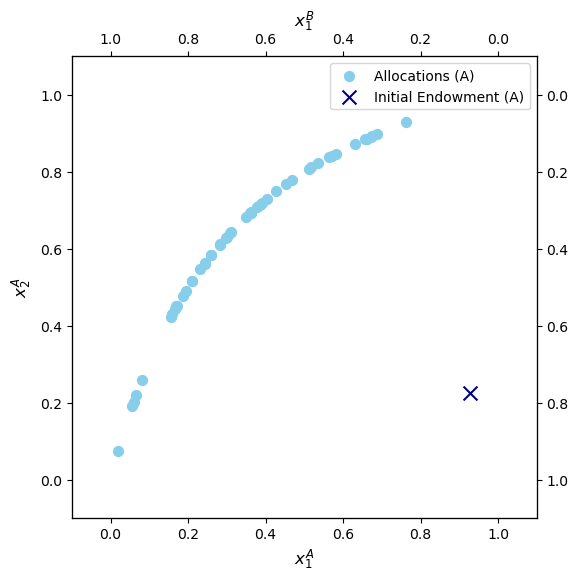

In [54]:
# Generate random endowments
random_endowments = model.generate_random_endowments(num_samples=50)

# Find market equilibrium allocations for each endowment
allocations = []
for w1A, w2A in random_endowments:
    x1A, x2A, x1B, x2B = model.find_market_equilibrium_allocation(w1A, w2A)
    allocations.append((x1A, x2A))

# Plot the allocations in the Edgeworth box
model.plot_edgeworth_box_with_allocations(allocations)